# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#THE EXCEPT IS NOT PRINTING
cloudiness, new_cities, country, date, humidity, lat, lng, max_temp, wind_speed = \
    [], [], [], [], [], [], [], [], []
print("Beginning Data Retrieval")
print("----------------------------------------------")
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
count = 1
record = 1
for city in cities:
    # Build query URL
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url).json()
    try:
        if record <= 50:
            print(f"Processing Record {record} of Set {count} | {city}")
            record += 1
        else:
            record = 1
            count += 1 
        cloudiness.append(weather_response["clouds"]["all"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        humidity.append(weather_response['main']['humidity'])
        lng.append(weather_response['coord']['lon'])
        lat.append(weather_response['coord']['lat'])
        wind_speed.append(weather_response["wind"]["speed"])
        max_temp.append(weather_response['main']['temp_max'])
        new_cities.append(city)
    except:
        print(f"City not found. Skipping...")
        pass
   #Change units to imperial 

Beginning Data Retrieval
----------------------------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | osa
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | ouango
Processing Record 8 of Set 1 | khash
Processing Record 9 of Set 1 | nagornskiy
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | juneau
Processing Record 13 of Set 1 | tatarskaya pishlya
Processing Record 14 of Set 1 | clarin
Processing Record 15 of Set 1 | kavieng
Processing Record 16 of Set 1 | capinopolis
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | port-gentil
Processing Record 19 of Set 1 | marystown
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 22 of Set 1 | lude

Processing Record 33 of Set 4 | bluff
Processing Record 34 of Set 4 | yatou
Processing Record 35 of Set 4 | hope
Processing Record 36 of Set 4 | dunedin
Processing Record 37 of Set 4 | pacific grove
Processing Record 38 of Set 4 | laguna
Processing Record 39 of Set 4 | lompoc
Processing Record 40 of Set 4 | castro
Processing Record 41 of Set 4 | upernavik
Processing Record 42 of Set 4 | tonantins
Processing Record 43 of Set 4 | benin
City not found. Skipping...
Processing Record 44 of Set 4 | slave lake
Processing Record 45 of Set 4 | portland
Processing Record 46 of Set 4 | frontera
Processing Record 47 of Set 4 | cifuentes
Processing Record 48 of Set 4 | phan thiet
Processing Record 49 of Set 4 | dawei
Processing Record 50 of Set 4 | iqaluit
Processing Record 1 of Set 5 | amderma
City not found. Skipping...
Processing Record 2 of Set 5 | khao wong
Processing Record 3 of Set 5 | bordighera
Processing Record 4 of Set 5 | sorvag
City not found. Skipping...
Processing Record 5 of Set 5 |

Processing Record 18 of Set 8 | calamar
Processing Record 19 of Set 8 | manta
Processing Record 20 of Set 8 | coolum beach
Processing Record 21 of Set 8 | taihe
Processing Record 22 of Set 8 | makakilo city
Processing Record 23 of Set 8 | awjilah
Processing Record 24 of Set 8 | yirol
City not found. Skipping...
Processing Record 25 of Set 8 | khonuu
City not found. Skipping...
Processing Record 26 of Set 8 | brokopondo
Processing Record 27 of Set 8 | koltubanovskiy
Processing Record 28 of Set 8 | komsomolskiy
Processing Record 29 of Set 8 | karaul
City not found. Skipping...
Processing Record 30 of Set 8 | alice springs
Processing Record 31 of Set 8 | soro
Processing Record 32 of Set 8 | carlsbad
Processing Record 33 of Set 8 | saint anthony
Processing Record 34 of Set 8 | pontianak
Processing Record 35 of Set 8 | roswell
Processing Record 36 of Set 8 | paradwip
City not found. Skipping...
Processing Record 37 of Set 8 | flinders
Processing Record 38 of Set 8 | jibuti
City not found. S

Processing Record 49 of Set 11 | abha
Processing Record 50 of Set 11 | zolotinka
City not found. Skipping...
Processing Record 1 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 2 of Set 12 | neuquen
Processing Record 3 of Set 12 | cabuyaro
Processing Record 4 of Set 12 | gus-zheleznyy
Processing Record 5 of Set 12 | rawson
Processing Record 6 of Set 12 | zhireken
Processing Record 7 of Set 12 | maniitsoq
Processing Record 8 of Set 12 | barkhan
Processing Record 9 of Set 12 | jiddah
City not found. Skipping...
Processing Record 10 of Set 12 | savannah bight
Processing Record 11 of Set 12 | conceicao do araguaia
Processing Record 12 of Set 12 | goderich
Processing Record 13 of Set 12 | riaba
City not found. Skipping...
Processing Record 14 of Set 12 | avera
Processing Record 15 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 16 of Set 12 | sikonge
Processing Record 17 of Set 12 | maceio
Processing Record 18 of Set 12 | ponta delgada
Processing 

In [7]:
print(f"Cloudiness:  {len(cloudiness)}")
print(f"New_cities:  {len(new_cities)}")
print(f"Country:     {len(country)}")
print(f"Date:        {len(date)}")
print(f"Humidity:    {len(humidity)}")
print(f"Lat:         {len(lat)}")
print(f"Lng:         {len(lng)}")
print(f"Max_temp:    {len(max_temp)}")
print(f"Wind_speed:  {len(wind_speed)}")


Cloudiness:  529
New_cities:  529
Country:     529
Date:        529
Humidity:    529
Lat:         529
Lng:         529
Max_temp:    529
Wind_speed:  529


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dict = {
    "City": new_cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv("Output/census_data.csv", encoding="utf-8", index=False)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,qaanaaq,29,GL,1578432165,91,77.48,-69.36,-24.79,1.99
1,ushuaia,75,AR,1578432165,81,-54.81,-68.31,51.80,9.17
2,osa,61,RU,1578432166,97,57.28,55.46,9.30,1.59
3,new norfolk,40,AU,1578432166,77,-42.78,147.06,63.00,4.70
4,punta arenas,85,CL,1578432166,38,-53.16,-70.91,60.80,17.22


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

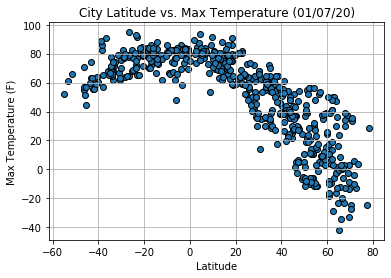

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (01/07/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Latitude vs. Temperature Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

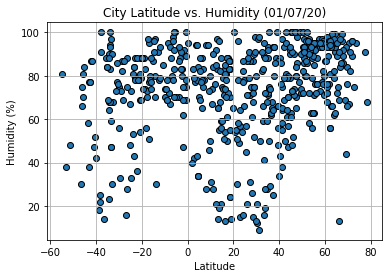

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Humidity (01/07/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Latitude vs.Humidity Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

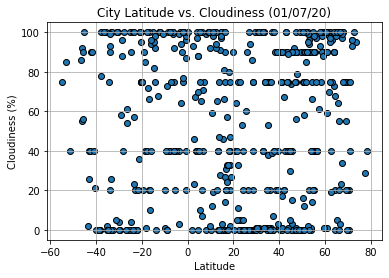

In [11]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Cloudiness (01/07/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Latitude vs.Cloudiness Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

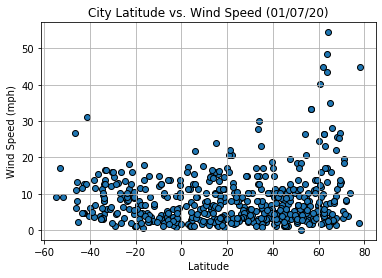

In [12]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Wind Speed (01/07/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Latitude vs.Wind Speed Plot.png")
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"Output/{ifig}.png")
    plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern = weather_data.loc[weather_data["Lat"] >= 0.0]
northern.reset_index(inplace=True)

southern = weather_data.loc[weather_data["Lat"] < 0.0]
southern.reset_index(inplace=True)
northern.head()

,index,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,qaanaaq,29,GL,1578432165,91,77.48,-69.36,-24.79,1.99
1,2,osa,61,RU,1578432166,97,57.28,55.46,9.30,1.59
2,5,vaini,0,IN,1578432167,79,15.34,74.49,65.88,1.43
3,6,ouango,88,CD,1578432167,34,4.31,22.55,75.78,2.73
4,7,khash,0,IR,1578432167,61,28.22,61.21,42.01,5.68


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8429955483924865


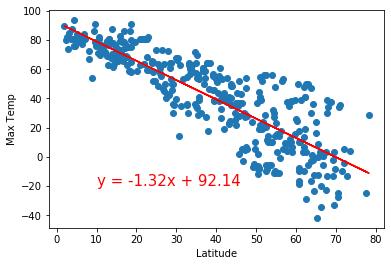

In [15]:
xdata = northern["Lat"]
ydata = northern["Max Temp"]
xlbl = "Latitude"
ylbl = "Max Temp"
lblpos = (10,-20)
ifig = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.49352538224213716


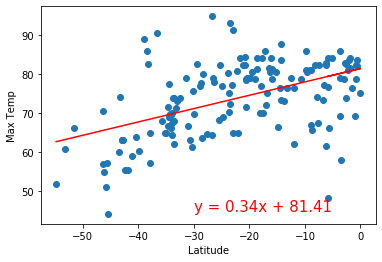

In [16]:
xdata = southern["Lat"]
ydata = southern["Max Temp"]
xlbl = "Latitude"
ylbl = "Max Temp"
lblpos = (-30,45)
ifig = "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3469061886473836


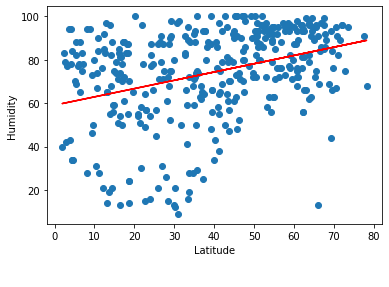

In [17]:
xdata = northern["Lat"]
ydata = northern["Humidity"]
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (10,-20)
ifig = "Northern Hemisphere - Humidity vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [1]:
xdata = southern["Lat"]
ydata = southern["Humidity"]
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (10,-20)
ifig = "Southern Hemisphere - Humidity vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

NameError: name 'southern' is not defined

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


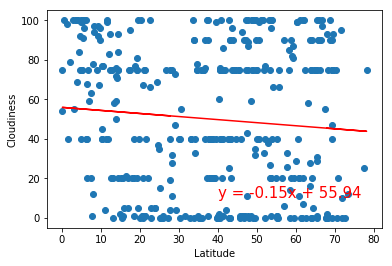

In [115]:
xdata = northern["Lat"]
ydata = northern["Cloudiness"]
xlbl = "Latitude"
ylbl = "Cloudiness"
lblpos = (10,20)
ifig = "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


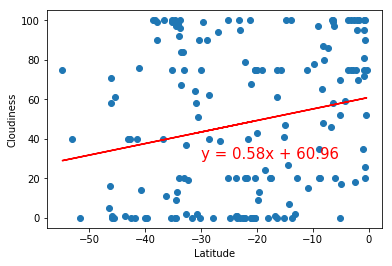

In [114]:
xdata = southern["Lat"]
ydata = southern["Cloudiness"]
xlbl = "Latitude"
ylbl = "Cloudiness"
lblpos = (10,20)
ifig = "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


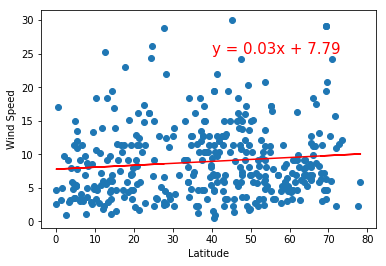

In [117]:
xdata = northern["Lat"]
ydata = northern["Wind Speed"]
xlbl = "Latitude"
ylbl = "Wind Speed"
lblpos = (40,25)
ifig = "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


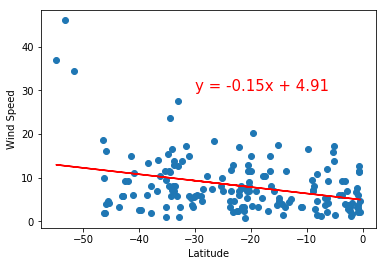

In [116]:
xdata = southern["Lat"]
ydata = southern["Wind Speed"]
xlbl = "Latitude"
ylbl = "Wind Speed"
lblpos = (-30,40)
ifig = "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

# Observations

1. As expected, temperature correlates well with the latitude. As latitude moves away from equator, temperature also decreases
2. It seems that there is no correlation between humidity and latitude
3. Even though there is very little correlation between wind speed and latitude, wind speed tends to be higher near arctic and antarctic